In [1]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
from predict import *
from plot import *
import importlib
from qc import *
from findWellPosGenes import *
importlib.reload(sys.modules['findWellPosGenes'])
from findWellPosGenes import *
from tqdm import tqdm

In [2]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [6]:
# read well positioned genes
sphe = '../data/4_dorado_202205_sphe_chrom_well_positioned_genes_cov16_cor0.5_var5500.bed'
sphe_gene ={}
with open(sphe) as infile:
    for line in infile:
        line=line.strip().split('\t')
        chr, start, end, genename, strand = line[0], line[1], line[2], line[3], line[5]
        sphe_gene[(genename, strand)] = f'{chr}:{start}-{end}'
print(f'n genes: {len(sphe_gene)}')

n genes: 57


In [5]:
# get single reads
predfile = '../data/prediction/240909_dorado_sphe_using_nuclei_model.tsv'
strand = ''
outpath = dt_outpath
na_thred = 0.2
max_meth = 200
prefix = '6_57_genes_sphe_chrom'
stranded = False
mtx, readnames, strands, genenames = [], [], [], []
pregions = sphe_gene


for (genename, strand), pregion in pregions.items():
    
    print(f'start processing gene {genename}...')
    
    chrom = pregion.split(':')[0]
    locus = pregion.split(':')[1].split('-')
    pstart, pend = int(locus[0]), int(locus[1])
    with open(predfile, 'r') as infile:
        for line in tqdm(infile):
            thischrom = line.strip().split('\t')[1]
            if thischrom!= chrom:
                continue
            thisread = line.strip().split('\t')[0]
            thisstrand = 1 if line.strip().split('\t')[2] == '+' else -1
            if stranded:
                if thisstrand != strand:
                    continue
            start = int(line.strip().split('\t')[3])
            scores = line.strip().split('\t')[-1]
            scores = [float(i) for i in scores.split(',')]
            
            sortedread = [(start+i,j) for i, j in enumerate(scores)]
            if sortedread[0][0] > pend or sortedread[-1][0] < pstart: continue
            
            pos_scores = {i:-1 for i in range(pstart, pend+1)}
            poss = [i[0] for i in sortedread]
            
            left = bisect_left(poss, pstart)
            
            for i in range(left, len(sortedread)):
                pos, score = sortedread[i]
                if pos > pend:
                    break
                if pos not in pos_scores:
                    continue
                pos_scores[pos] = score
            
            thisscores = np.array([v for v in pos_scores.values()])
            # flip if the gene is on reverse strand
            thisscores = np.flip(thisscores) if strand == '-' else thisscores
            
            if np.sum(thisscores) != -1*len(thisscores):
                mtx.append(thisscores)
                readnames.append(thisread)
                strands.append(thisstrand)
                genenames.append(genename)
    print(f'finished processing gene {genename}...')

mtx = np.array(mtx, dtype = float)
mtx[mtx==-1] = np.nan
readnames = np.array(readnames, dtype = str)
strands = np.array(strands, dtype = int)
genenames = np.array(genenames, dtype = str)

print('number of reads before filtering:', len(readnames))
print(f'filtering reads with more than {na_thred} NA...')
little_na = np.invert(np.isnan(mtx).sum(axis = 1)>(mtx.shape[1]*na_thred))
mtx = mtx[little_na,:]
readnames = readnames[little_na]
strands = strands[little_na]
genenames = genenames[little_na]
print(f'number of reads kept: {len(readnames)}', )
print(f'filtering hyper-methylated reads...')
hyper_meth= np.invert(np.nanmean(mtx, axis = 1)>max_meth)
mtx = mtx[hyper_meth,:]
readnames = readnames[hyper_meth]
strands = strands[hyper_meth]
genenames = genenames[hyper_meth]
print(f'number of reads kept: {len(readnames)}')

outfile = outpath + prefix + '.mtx'
print('writing output to file: ', outfile)
mtxFh = open(outfile, 'w')
for line in mtx:
    mtxFh.write(','.join(np.array(line, dtype = str)) + '\n')
mtxFh.close()

outfile2 = outpath + prefix + '_rowannot.tsv'
outf = open(outfile2, 'w')
for i,j,k in zip(readnames, strands, genenames):
    outf.write(f'{i}\t{j}\t{k}\n')
outf.close()

start processing gene APS3...


13344it [00:10, 1238.53it/s]


finished processing gene APS3...
start processing gene RPL21B...


13344it [00:09, 1401.86it/s]


finished processing gene RPL21B...
start processing gene RSE1...


13344it [00:09, 1421.45it/s]


finished processing gene RSE1...
start processing gene GSF2...


13344it [00:09, 1424.97it/s]


finished processing gene GSF2...
start processing gene LSB6...


13344it [00:07, 1761.79it/s]


finished processing gene LSB6...
start processing gene RDS3...


13344it [00:09, 1465.05it/s]


finished processing gene RDS3...
start processing gene PXA1...


13344it [00:09, 1438.41it/s]


finished processing gene PXA1...
start processing gene DPB11...


13344it [00:07, 1777.61it/s]


finished processing gene DPB11...
start processing gene SPL2...


13344it [00:06, 2191.21it/s]


finished processing gene SPL2...
start processing gene MTC6...


13344it [00:06, 2176.57it/s]


finished processing gene MTC6...
start processing gene AIM39...


13344it [00:09, 1431.25it/s]


finished processing gene AIM39...
start processing gene SUM1...


13344it [00:12, 1059.49it/s]


finished processing gene SUM1...
start processing gene YET1...


13344it [00:06, 2054.59it/s]


finished processing gene YET1...
start processing gene BYE1...


13344it [00:06, 2065.89it/s]


finished processing gene BYE1...
start processing gene SEF1...


13344it [00:08, 1661.32it/s]


finished processing gene SEF1...
start processing gene STB2...


13344it [00:09, 1453.07it/s]


finished processing gene STB2...
start processing gene zz-YEL023C...


13344it [00:07, 1897.10it/s]


finished processing gene zz-YEL023C...
start processing gene PUS9...


13344it [00:12, 1067.25it/s]


finished processing gene PUS9...
start processing gene BUB1...


13344it [00:10, 1309.28it/s]


finished processing gene BUB1...
start processing gene FYV4...


13344it [00:06, 2110.68it/s]


finished processing gene FYV4...
start processing gene CDC16...


13344it [00:06, 2036.22it/s]


finished processing gene CDC16...
start processing gene SSF1...


13344it [00:06, 2162.47it/s]


finished processing gene SSF1...
start processing gene CCT3...


13344it [00:07, 1764.28it/s]


finished processing gene CCT3...
start processing gene GPI2...


13344it [00:09, 1471.28it/s]


finished processing gene GPI2...
start processing gene BUD13...


13344it [00:10, 1314.55it/s]


finished processing gene BUD13...
start processing gene zz-YLR012C...


13344it [00:11, 1182.92it/s]


finished processing gene zz-YLR012C...
start processing gene UPS1...


13344it [00:11, 1184.11it/s]


finished processing gene UPS1...
start processing gene PSH1...


13344it [00:09, 1444.26it/s]


finished processing gene PSH1...
start processing gene RSC6...


13344it [00:04, 2830.47it/s]


finished processing gene RSC6...
start processing gene MDH3...


13344it [00:12, 1071.50it/s]


finished processing gene MDH3...
start processing gene CNE1...


13344it [00:04, 3016.28it/s]


finished processing gene CNE1...
start processing gene OM14...


13344it [00:08, 1666.28it/s]


finished processing gene OM14...
start processing gene CAP2...


13344it [00:05, 2441.42it/s]


finished processing gene CAP2...
start processing gene UTP5...


13344it [00:12, 1071.72it/s]


finished processing gene UTP5...
start processing gene SCT1...


13344it [00:08, 1664.78it/s]


finished processing gene SCT1...
start processing gene PFK1...


13344it [00:10, 1317.49it/s]


finished processing gene PFK1...
start processing gene KAR2...


13344it [00:07, 1769.49it/s]


finished processing gene KAR2...
start processing gene RNH201...


13344it [00:07, 1739.42it/s]


finished processing gene RNH201...
start processing gene SHY1...


13344it [00:10, 1310.86it/s]


finished processing gene SHY1...
start processing gene SKG3...


13344it [00:11, 1184.93it/s]


finished processing gene SKG3...
start processing gene URA6...


13344it [00:06, 2047.49it/s]


finished processing gene URA6...
start processing gene MIN9...


13344it [00:06, 2057.01it/s]


finished processing gene MIN9...
start processing gene BIO5...


13344it [00:07, 1743.11it/s]


finished processing gene BIO5...
start processing gene CDC8...


13344it [00:07, 1774.87it/s]


finished processing gene CDC8...
start processing gene SFT1...


13344it [00:06, 2053.65it/s]


finished processing gene SFT1...
start processing gene MIN8...


13344it [00:09, 1466.30it/s]


finished processing gene MIN8...
start processing gene DUG3...


13344it [00:07, 1740.65it/s]


finished processing gene DUG3...
start processing gene MED6...


13344it [00:06, 2172.02it/s]


finished processing gene MED6...
start processing gene RCF1...


13344it [00:09, 1438.94it/s]


finished processing gene RCF1...
start processing gene TMA22...


13344it [00:07, 1771.80it/s]


finished processing gene TMA22...
start processing gene HGH1...


13344it [00:10, 1300.19it/s]


finished processing gene HGH1...
start processing gene PUG1...


13344it [00:07, 1903.71it/s]


finished processing gene PUG1...
start processing gene GUA1...


13344it [00:09, 1444.37it/s]


finished processing gene GUA1...
start processing gene UME6...


13344it [00:12, 1069.13it/s]


finished processing gene UME6...
start processing gene SPO12...


13344it [00:06, 2136.11it/s]


finished processing gene SPO12...
start processing gene NOP13...


13344it [00:07, 1739.32it/s]


finished processing gene NOP13...
start processing gene POG1...


13344it [00:05, 2425.33it/s]


finished processing gene POG1...
number of reads before filtering: 1108
filtering reads with more than 0.2 NA...
number of reads kept: 977
filtering hyper-methylated reads...
number of reads kept: 975
writing output to file:  ../data/6_57_genes_sphe_chrom.mtx


In [7]:
mtx = []
with open('../data/6_57_genes_sphe_chrom.mtx', 'r') as infile:
    for line in infile:
        mod = [float(i) for i in line.strip().split(',')]
        mtx.append(mod)

readnames, strands, genenames = [], [], []
with open('../data/6_57_genes_sphe_chrom_rowannot.tsv', 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        readnames.append(str(line[0]))
        strands.append(str(line[1]))
        genenames.append(str(line[2]))


mtx = np.array(mtx, dtype = float)
readnames = np.array(readnames, dtype = str)
strands = np.array(strands, dtype = int)
genenames = np.array(genenames, dtype = str)

In [4]:
if np.isnan(mtx).sum() != 0:
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    new_mtx = imp.fit_transform(mtx)
else:
    new_mtx = mtx

df = pd.DataFrame(new_mtx)
df['gene'] = genenames  # Add the gene annotation to the matrix as a new column

# Group the matrix by gene
df['gene'] = pd.Categorical(df['gene'], categories=[i[0] for i in pregions][::-1], ordered=True)
df = df.sort_values('gene')

grouped_by_gene = df.groupby('gene', sort=False)

# Function for KMeans clustering for each gene
def kmeans_clustering_for_gene(gene_group, n_clusters=3):
    # Exclude the 'gene' column for clustering
    gene_reads = gene_group.drop(columns=['gene'])
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(gene_reads)
    
    # Add the cluster labels as a new column
    gene_group['cluster'] = clusters
    
    # Sort the rows by cluster labels
    sorted_gene_group = gene_group.sort_values(by='cluster')
    
    return sorted_gene_group.drop(columns=['cluster'])  # Drop the cluster column after sorting

# Function for hierarchical clustering for each gene
def hierarchical_clustering_for_gene(gene_group, method='ward', n_clusters=3):
    # Exclude the 'gene' column for clustering
    gene_reads = gene_group.drop(columns=['gene'])
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(gene_reads, method=method)
    
    # Get the flat clusters based on n_clusters
    clusters = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    
    # Add the cluster labels as a new column
    gene_group['cluster'] = clusters
    
    # Sort the rows by cluster labels
    sorted_gene_group = gene_group.sort_values(by='cluster')
    
    return sorted_gene_group.drop(columns=['cluster'])  # Drop the cluster column after sorting

# 1. Apply clustering on each gene group and collect sorted groups
sorted_groups, clustered_genes = [], []

for gene_name, gene_group in grouped_by_gene:
    print(f"Clustering for {gene_name}")
    
    # Choose KMeans or Hierarchical clustering
    sorted_gene_group = kmeans_clustering_for_gene(gene_group, n_clusters=3)
    # Alternatively, use hierarchical clustering:
    # sorted_gene_group = hierarchical_clustering_for_gene(gene_group, n_clusters=3)

    # Append the sorted group to the list
    sorted_groups.append(sorted_gene_group.drop(columns=['gene']))  # Remove 'gene' column

    clustered_genes.extend([gene_name] * len(sorted_gene_group))
# 2. Concatenate all sorted groups back into one matrix
clustered_mtx = pd.concat(sorted_groups, axis=0).values  # Convert to numpy array

# The final output matrix
print("clustered matrix shape:", clustered_mtx.shape)

NameError: name 'pregions' is not defined

In [ ]:
plt.figure(figsize=(5, 8))
pstart, pend = (-600, 600)
xticks_space = 150
ax = plt.axes((0.1, 0.1, 0.9, 0.9))
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_xticks(ticks= np.arange(pstart, pend+1, xticks_space))
ax.set_xticklabels(ax.get_xticks(), rotation = 50)
ax.set_xlim(pstart, pend)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
height = (1, 1)
bottom=0
tick_yaxis, label_yaxis = [],[]
total, count = np.zeros(clustered_mtx.shape[1], dtype = int), np.zeros(clustered_mtx.shape[1], dtype = int)
(R,G,B) = colorMap(palette = 'viridis', log_scale=False)
thisgene = ''

for i in tqdm(range(clustered_mtx.shape[0])):
    left = -600
    if thisgene != clustered_genes[i]:
        tick_yaxis.append(bottom)
        label_yaxis.append(clustered_genes[i])
        thisgene = clustered_genes[i]
    for j in range(clustered_mtx.shape[1]):
        score = clustered_mtx[i, j]
        if not np.isnan(score):
            count[j] += score
            total[j] += 1
        # no score at this position
        if np.isnan(score):
            col = 'lightgray'
        else:
            color = int((score/256)*100)
            col=(R[color],G[color],B[color])
        thisalpha = 1
        rectangle = mplpatches.Rectangle([left, bottom-(height[0]*0.5)], 1, height[0], 
                                         facecolor = col, edgecolor = 'silver', linewidth = 0, alpha=thisalpha)
        ax.add_patch(rectangle)
        left += 1
    bottom +=height[0]

aggregate = np.divide(np.divide(count, total), 256)
if np.max(total) < 1:
    aggregate = np.zeros(clustered_mtx.shape[1])
ax.bar(np.arange(pstart, pend+1), aggregate, bottom=bottom, width = 1.0, color = 'tab:blue')
ax.set_yticks(ticks = tick_yaxis, labels = label_yaxis)
ax.set_ylim(0-0.5*height[0], bottom)
ax.set_xlabel('distance from +1 nucleosome')
plt.savefig(fig_outpath+ f'6_top_well_positioned_genes_clustered_within_gene_sphe.pdf', bbox_inches='tight')

100%|█████████████████████████████████████████████████████████████| 975/975 [18:55<00:00,  1.16s/it]


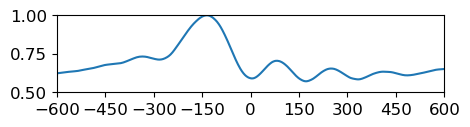

In [11]:
from scipy.signal import savgol_filter
smoothed_agg = savgol_filter(aggregate, 150, 3, mode="nearest")
peak = max(smoothed_agg)
smoothed_agg = smoothed_agg/peak
plt.figure(figsize=(5, 1))
plt.plot(np.arange(pstart, pend+1), smoothed_agg)
plt.xticks(ticks= np.arange(pstart, pend+1, xticks_space))
plt.yticks(ticks= [0.5, 0.75, 1.0])
plt.ylim(0.5, max(smoothed_agg))
plt.xlim(-600, 600)
plt.savefig(fig_outpath+ f'6_top_aggregated_panel_sphe.pdf', bbox_inches='tight')

100%|████████████████████████████████████████████████████████████| 975/975 [00:08<00:00, 111.71it/s]


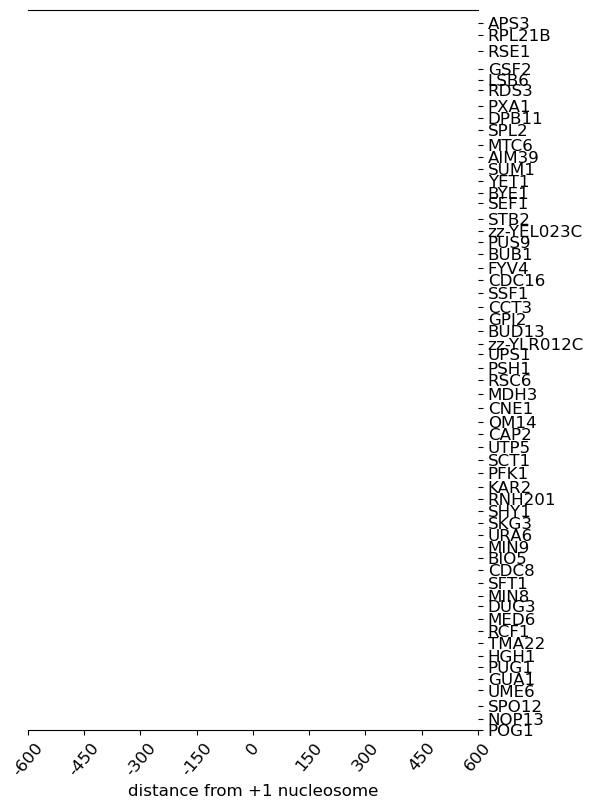

In [12]:
plt.figure(figsize=(5, 8))
pstart, pend = (-600, 600)
xticks_space = 150
ax = plt.axes((0.1, 0.1, 0.9, 0.9))
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_xticks(ticks= np.arange(pstart, pend+1, xticks_space))
ax.set_xticklabels(ax.get_xticks(), rotation = 50)
ax.set_xlim(pstart, pend)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
height = (1, 1)
bottom=0
tick_yaxis, label_yaxis = [],[]
total, count = np.zeros(clustered_mtx.shape[1], dtype = int), np.zeros(clustered_mtx.shape[1], dtype = int)
(R,G,B) = colorMap(palette = 'viridis', log_scale=False)
thisgene = ''

for i in tqdm(range(clustered_mtx.shape[0])):
    left = -600
    if thisgene != clustered_genes[i]:
        tick_yaxis.append(bottom)
        label_yaxis.append(clustered_genes[i])
        thisgene = clustered_genes[i]
    for j in range(clustered_mtx.shape[1]):
        score = clustered_mtx[i, j]
        if not np.isnan(score):
            count[j] += score
            total[j] += 1
        # no score at this position
        if np.isnan(score):
            col = 'lightgray'
        else:
            color = int((score/256)*100)
            col=(R[color],G[color],B[color])
        thisalpha = 1
        # rectangle = mplpatches.Rectangle([left, bottom-(height[0]*0.5)], 1, height[0], 
                                         # facecolor = col, edgecolor = 'silver', linewidth = 0, alpha=thisalpha)
        # ax.add_patch(rectangle)
        left += 1
    bottom +=height[0]

aggregate = np.divide(np.divide(count, total), 256)
if np.max(total) < 1:
    aggregate = np.zeros(clustered_mtx.shape[1])
ax.bar(np.arange(pstart, pend+1), aggregate, bottom=bottom, width = 1.0, color = 'tab:blue')
ax.set_yticks(ticks = tick_yaxis, labels = label_yaxis)
ax.set_ylim(0-0.5*height[0], bottom)
ax.set_xlabel('distance from +1 nucleosome')
plt.savefig(fig_outpath+ f'6_top_well_positioned_genes_clustered_within_gene_sphe_text_only.pdf', bbox_inches='tight')